In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('../../data/AirPassengers.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [3]:
data.head(13)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
Name: #Passengers, dtype: int64

In [4]:
diff = data.diff(12)

In [5]:
diff.head(13)

Month
1949-01-01    NaN
1949-02-01    NaN
1949-03-01    NaN
1949-04-01    NaN
1949-05-01    NaN
1949-06-01    NaN
1949-07-01    NaN
1949-08-01    NaN
1949-09-01    NaN
1949-10-01    NaN
1949-11-01    NaN
1949-12-01    NaN
1950-01-01    3.0
Name: #Passengers, dtype: float64

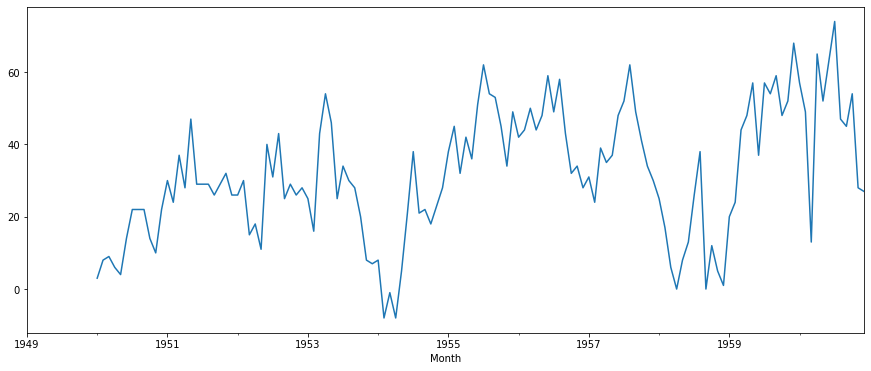

In [6]:
diff.plot();

In [7]:
diff = diff[12:]

In [8]:
diff.head()

Month
1950-01-01    3.0
1950-02-01    8.0
1950-03-01    9.0
1950-04-01    6.0
1950-05-01    4.0
Name: #Passengers, dtype: float64

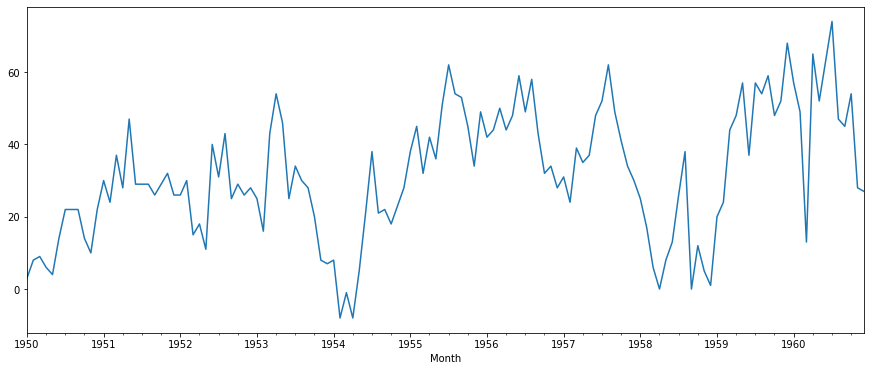

In [9]:
diff.plot();

In [15]:
df = pd.DataFrame()
for i in range(12, 0, -1):
    df['t-'+str(i)] = diff.shift(i)
df['t'] = diff.values
df = df[12:]

In [16]:
df.head(13)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
Month,,,,,,,,,,,,,
1951-01-01,3.0,8.0,9.0,6.0,4.0,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0
1951-02-01,8.0,9.0,6.0,4.0,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0,24.0
1951-03-01,9.0,6.0,4.0,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0,24.0,37.0
1951-04-01,6.0,4.0,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0,24.0,37.0,28.0
1951-05-01,4.0,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0,24.0,37.0,28.0,47.0
1951-06-01,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0,24.0,37.0,28.0,47.0,29.0
1951-07-01,22.0,22.0,22.0,14.0,10.0,22.0,30.0,24.0,37.0,28.0,47.0,29.0,29.0
1951-08-01,22.0,22.0,14.0,10.0,22.0,30.0,24.0,37.0,28.0,47.0,29.0,29.0,29.0
1951-09-01,22.0,14.0,10.0,22.0,30.0,24.0,37.0,28.0,47.0,29.0,29.0,29.0,26.0


In [17]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [25]:
y

Month
1951-01-01    30.0
1951-02-01    24.0
1951-03-01    37.0
1951-04-01    28.0
1951-05-01    47.0
              ... 
1960-08-01    47.0
1960-09-01    45.0
1960-10-01    54.0
1960-11-01    28.0
1960-12-01    27.0
Name: t, Length: 120, dtype: float64

In [26]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, y)

RandomForestRegressor(n_estimators=500, random_state=42)

In [35]:
names = df.columns[:-1]
importances = model.feature_importances_

In [36]:
ticks = [i for i in range(len(names))]

In [37]:
ticks

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [46]:
importance = pd.DataFrame(data=importances, index=names, columns=['importance']).sort_values(by='importance', ascending=False)

In [47]:
importance

,importance
t-1,0.490519
t-2,0.181515
t-3,0.047600
t-4,0.044150
t-12,0.041368
t-11,0.034674
t-7,0.033810
t-6,0.028369
t-5,0.026526
t-8,0.026069


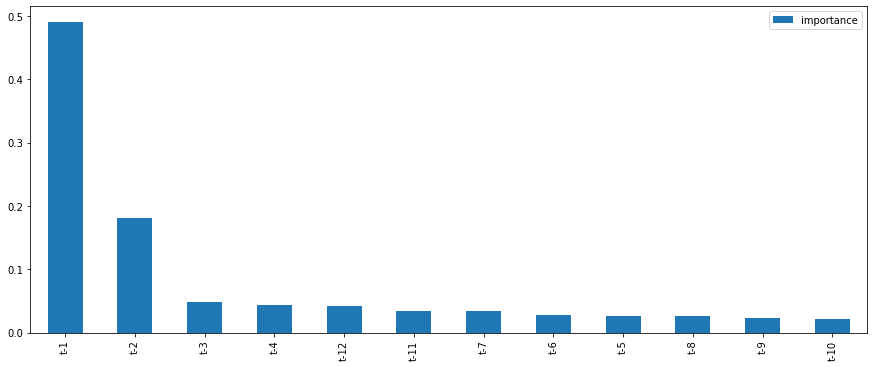

In [49]:
importance.plot(kind='bar');

In [50]:
from sklearn.feature_selection import RFE

In [67]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)

In [68]:
rfe.fit(X, y)

RFE(estimator=RandomForestRegressor(n_estimators=500, random_state=42),
    n_features_to_select=5)

In [69]:
rfe.support_

array([ True, False, False, False, False, False, False, False,  True,
        True,  True,  True])

In [70]:
names = df.columns[:-1]

In [71]:
names

Index(['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1'],
      dtype='object')

In [72]:
selected = list()
for i in range(len(names)):
    if rfe.support_[i]:
        selected.append(names[i])

In [73]:
selected

['t-12', 't-4', 't-3', 't-2', 't-1']